# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df.drop(columns=['Id'], inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
percent_missing = df.isnull().sum() * 100 / len(df)

missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

missing_value_df[missing_value_df['percent_missing'] > 20]

,column_name,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here

drop_cols = list(missing_value_df[missing_value_df['percent_missing'] > 20].index)

df.drop(columns=drop_cols, inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

<AxesSubplot:ylabel='Frequency'>

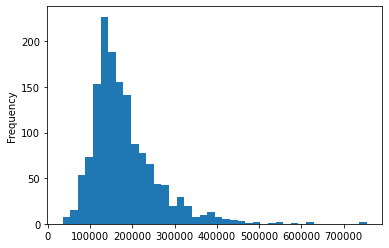

In [6]:
# your code here
df['SalePrice'].plot.hist(bins=40)

In [7]:
# your comment here
'''
The Sale price is similar with normal distribution but it is right skewed as it has long tail on the 
right side (and the mean can be found right mode- the highest bar on the histogram). 
Since the skew parameter is higher can be assume that this data is highly skewed.
'''


'\nThe Sale price is similar with normal distribution but it is right skewed as it has long tail on the \nright side (and the mean can be found right mode- the highest bar on the histogram). \nSince the skew parameter is higher can be assume that this data is highly skewed.\n'

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
#https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
df['SalePrice'].agg(['skew', 'kurtosis']).transpose()

skew        1.882876
kurtosis    6.536282
Name: SalePrice, dtype: float64

## Challenge 2 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

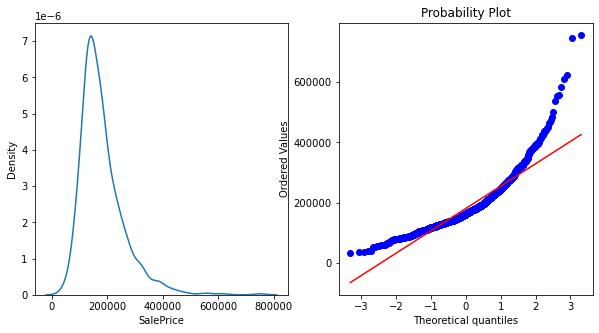

1.8828757597682129

In [10]:
# your code here
import scipy.stats as stats
import pylab


def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

normality(df,'SalePrice')

df['SalePrice'].skew()

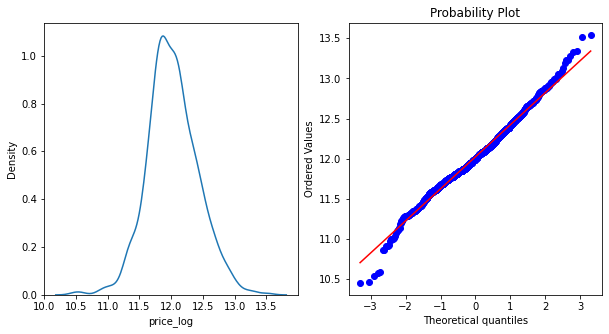

0.12133506220520406

In [11]:
#Log transformation, performing logarithmic transformation on the feature

df['price_log']=np.log(df['SalePrice'])


normality(df,'price_log')

df['price_log'].skew()

In [12]:
#With the log trasnformations the value of skew is lower, moore similar with normal distribuiton

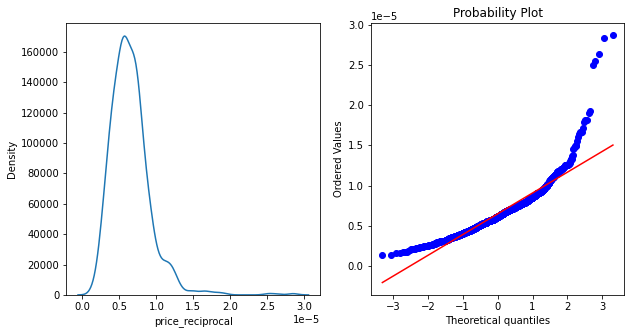

2.142121472065559

In [13]:
#Reciprocal Transforamtion, this will reverse values of Price

df['price_reciprocal']=1/df.SalePrice

normality(df,'price_reciprocal')

df['price_reciprocal'].skew()

In [14]:
#With the reciprocal transforamtion the value of skew is increased, less similar with normal distribuiton

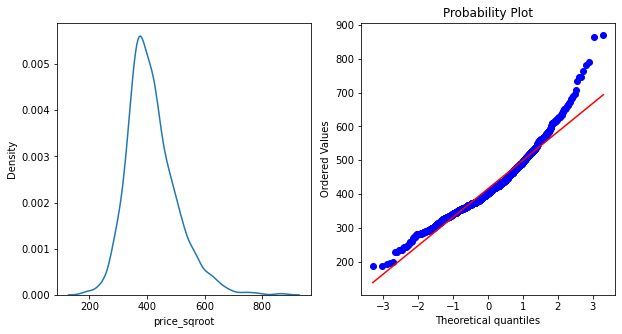

0.9431527373310963

In [15]:
#Square Root Transformation – This transformation will take the square root of the Price
df['price_sqroot']=np.sqrt(df.SalePrice)

normality(df,'price_sqroot')

df['price_sqroot'].skew()

In [16]:
#The Square Root Transformation, lower the skew still high

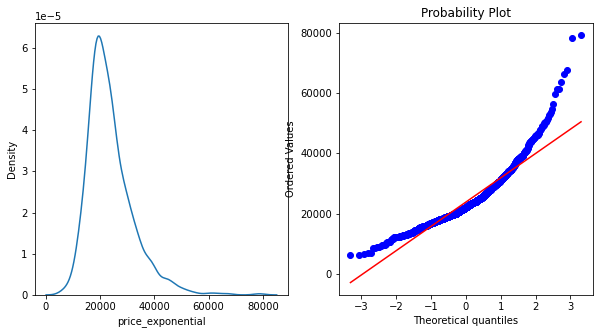

1.543250090390253

In [17]:
#Exponential Transformation: The exponential value of the Price variable will be taken.
df['price_exponential']=df.SalePrice**(1/1.2)

normality(df,'price_exponential')

df['price_exponential'].skew()

In [18]:
#The Exponential Transformation still give the skew high

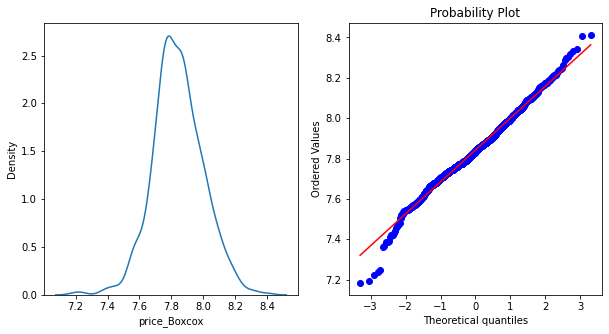

-0.008652893640830005

In [19]:
#Box-Cox Transformation

df['price_Boxcox'],parameters=stats.boxcox(df['SalePrice'])

normality(df,'price_Boxcox')

df['price_Boxcox'].skew()

In [20]:
#The Box-Cox Transformation gives the best result of skew, moore of similar with normal distribuition

## Challenge 3 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [21]:
# your code here
df[['GrLivArea','LotArea','GarageArea']].head()

,GrLivArea,LotArea,GarageArea
0,1710,8450,548
1,1262,9600,460
2,1786,11250,608
3,1717,9550,642
4,2198,14260,836


In [22]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [23]:
df['area']=df['GrLivArea'] + df['LotArea'] + df['GarageArea']

#Correlation betewen sale price and area, that is the sum of all the area of the house
df['SalePrice'].corr(df['area'])

0.3084382175281738

In [24]:
#Correlation betewen price Boxcox and area, that is the sum of all the area of the house
df['price_Boxcox'].corr(df['area'])

0.3001059076875071

In [25]:
#The are no much diferente in the relacion, i will anlalise with sale price
df[['GrLivArea','LotArea','GarageArea','SalePrice']].corr()

,GrLivArea,LotArea,GarageArea,SalePrice
GrLivArea,1.000000,0.263116,0.468997,0.708624
LotArea,0.263116,1.000000,0.180403,0.263843
GarageArea,0.468997,0.180403,1.000000,0.623431
SalePrice,0.708624,0.263843,0.623431,1.000000


<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>

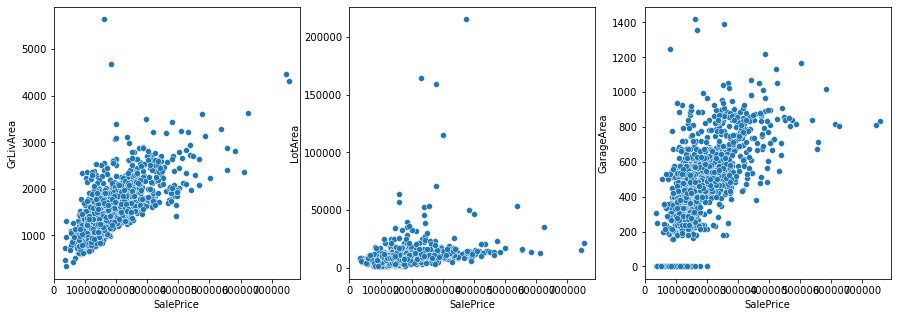

<Figure size 720x720 with 0 Axes>

In [26]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(15, 5))

plt.figure(figsize=(10,10))
    
sns.scatterplot(x=df.SalePrice, y=df.GrLivArea, ax=ax1)

sns.scatterplot(x=df.SalePrice, y=df.LotArea, ax=ax2)

sns.scatterplot(x=df.SalePrice, y=df.GarageArea, ax=ax3)

In [27]:
#The high correlation of the price sale is with GrLivArea.

In [28]:
#Analyse with the number of rooms

df['no_rooms']=df['BedroomAbvGr']+df['KitchenAbvGr']+df['FullBath']+df['HalfBath']+df['BsmtFullBath']+df['BsmtHalfBath']

df['SalePrice'].corr(df['no_rooms'])

0.47070228000137654

In [29]:
#The number of rooms have moore correaltion with the price sale that hte area. 
#Whill check whick zone of the house moore influence the price of the house
corr = df[['BedroomAbvGr','KitchenAbvGr','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','SalePrice']].corr()
corr

,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,SalePrice
BedroomAbvGr,1.000000,0.198597,0.363252,0.226651,-0.150673,0.046519,0.168213
KitchenAbvGr,0.198597,1.000000,0.133115,-0.068263,-0.041503,-0.037944,-0.135907
FullBath,0.363252,0.133115,1.000000,0.136381,-0.064512,-0.054536,0.560664
HalfBath,0.226651,-0.068263,0.136381,1.000000,-0.030905,-0.012340,0.284108
BsmtFullBath,-0.150673,-0.041503,-0.064512,-0.030905,1.000000,-0.147871,0.227122
BsmtHalfBath,0.046519,-0.037944,-0.054536,-0.012340,-0.147871,1.000000,-0.016844
SalePrice,0.168213,-0.135907,0.560664,0.284108,0.227122,-0.016844,1.000000


<AxesSubplot:>

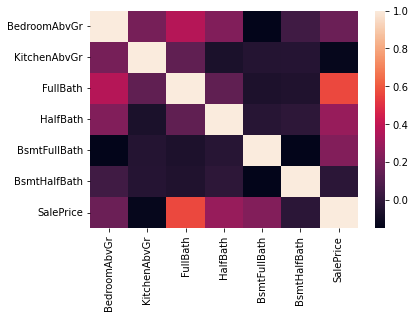

In [30]:
#Heatmap, to confirm that the full bath as moore correaltion with the price of the house
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:xlabel='no_rooms', ylabel='SalePrice'>

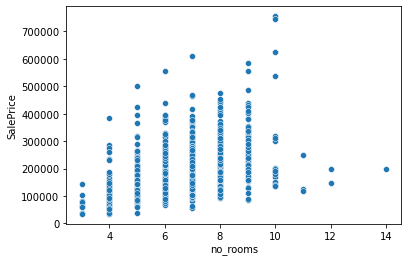

In [31]:
#To see how much numer of divisions influence the price
sns.scatterplot(x=df.no_rooms,y=df.SalePrice)

In [32]:
#Year built and year remodeled
df['age_built']= 2021 - df['YearBuilt']

df['age_remodel']= 2021 - df['YearRemodAdd']

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,price_log,price_reciprocal,price_sqroot,price_exponential,price_Boxcox,area,no_rooms,age_built,age_remodel
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,208500,12.247694,0.000005,456.618002,27076.241733,7.932610,10708,8,18,18
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,181500,12.109011,0.000006,426.028168,24121.104554,7.878263,11322,7,45,45
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,223500,12.317167,0.000004,472.757866,28690.047871,7.959618,13644,8,20,19
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,140000,11.849398,0.000007,374.165739,19428.533912,7.774955,11909,6,106,51
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,250000,12.429216,0.000004,500.000000,31498.026247,8.002875,17294,9,21,21


In [33]:
corr = df[['SalePrice','age_built','age_remodel']].corr()
corr

,SalePrice,age_built,age_remodel
SalePrice,1.000000,-0.522897,-0.507101
age_built,-0.522897,1.000000,0.592855
age_remodel,-0.507101,0.592855,1.000000


<AxesSubplot:>

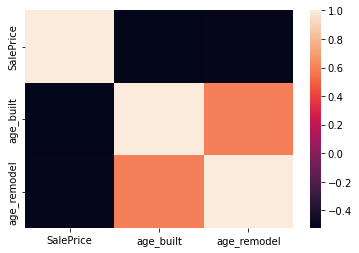

In [34]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

<AxesSubplot:xlabel='age_built', ylabel='SalePrice'>

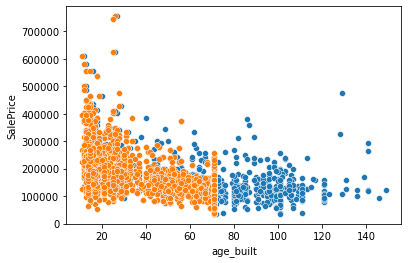

In [35]:
sns.scatterplot(x=df.age_built,y=df.SalePrice)

sns.scatterplot(x=df.age_remodel,y=df.SalePrice)

In [36]:
#Exist a negative correlation betewen the price and the years of construction and remodelation

In [37]:
#The neigbourhood
neigbour = df.groupby('Neighborhood')['SalePrice'].agg(['mean'])

neigbour.sort_values(['mean'], inplace=True)

<AxesSubplot:xlabel='Neighborhood'>

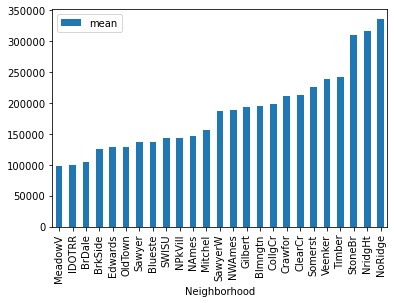

In [38]:
neigbour.plot.bar()

In [39]:
#Teh most lenar correlation betewen price and neigbourhood

## Challenge 4 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

<AxesSubplot:>

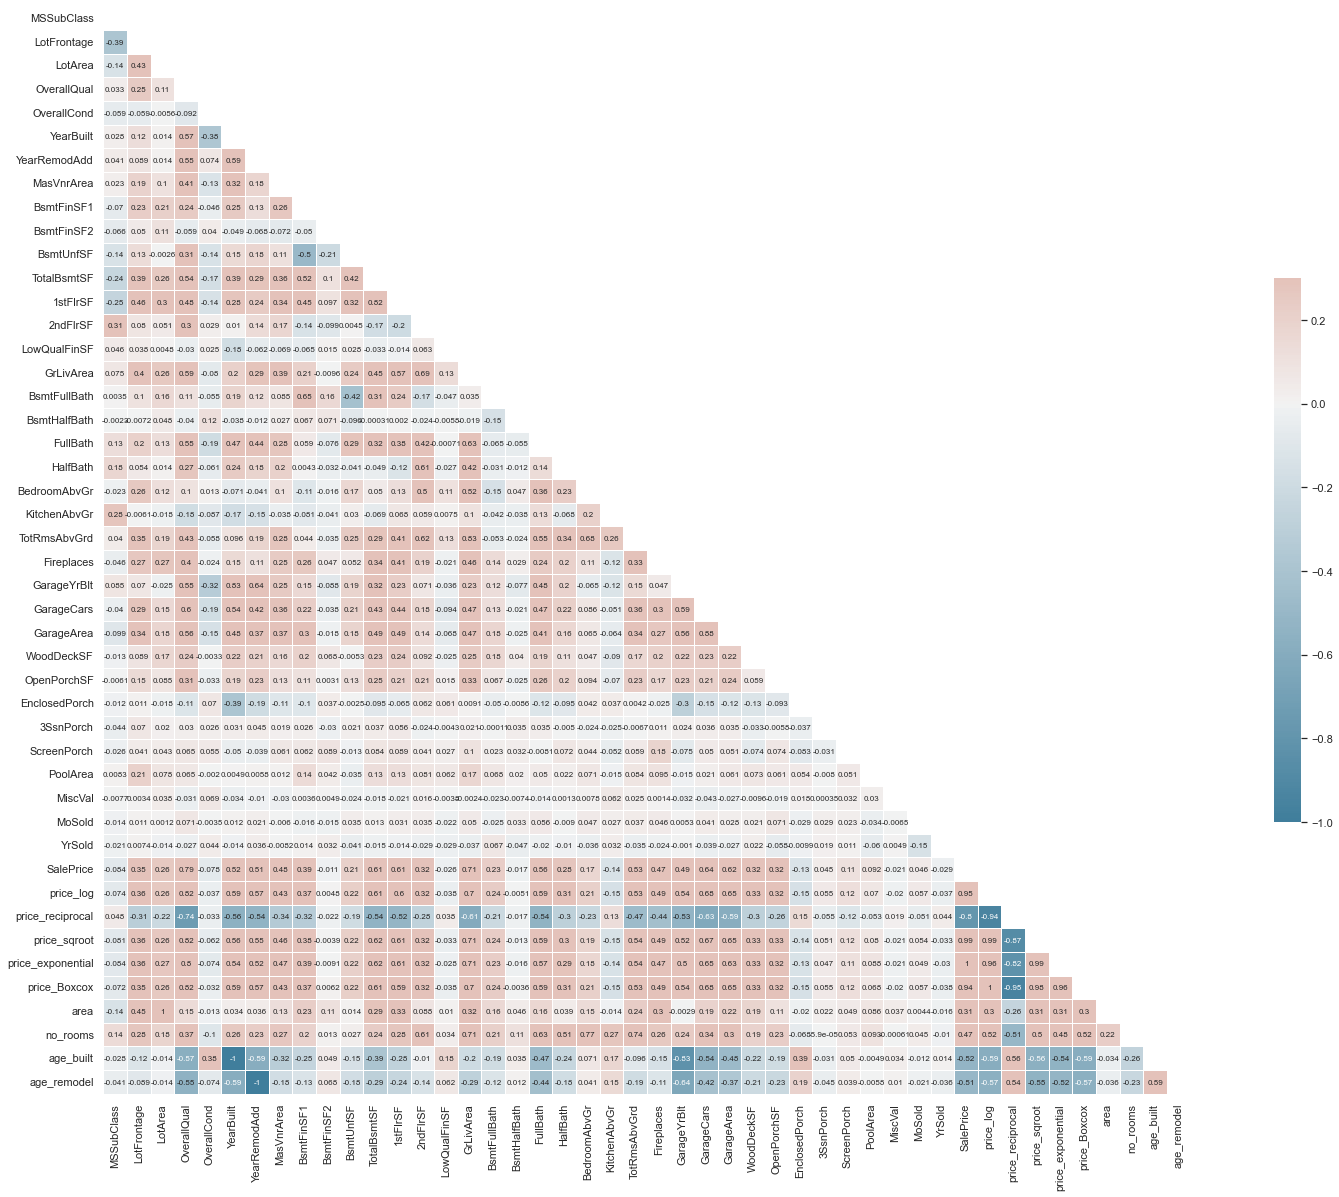

In [40]:
# your code here
sns.set_theme(style="white")

corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 8})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [41]:
# your comment here
"""The bigger correaltions are 
overallqual 0.79
Grlivarea 0.71
GarageArea 0.62
TotalBsmtsf 0.61
1stFlrsf 0.61"""

'The bigger correaltions are \noverallqual 0.79\nGrlivarea 0.71\nGarageArea 0.62\nTotalBsmtsf 0.61\n1stFlrsf 0.61'

## Challenge 5 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [42]:
# your responses here
"""For the correaltion obtain, the biger factores on price of house, are quality, 
general area, area of basemente and garage, and age of the house, and number of bathrooms """


'For the correaltion obtain, the biger factores on price of house, are quality, \ngeneral area, area of basemente and garage, and age of the house, and number of bathrooms '

<AxesSubplot:>

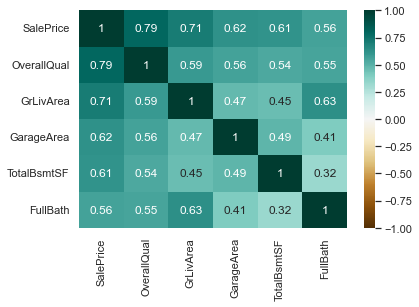

In [43]:
filtered=df[['SalePrice','OverallQual','GrLivArea','GarageArea','TotalBsmtSF', 'Neighborhood', 'FullBath']]

sns.heatmap(filtered.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')